In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

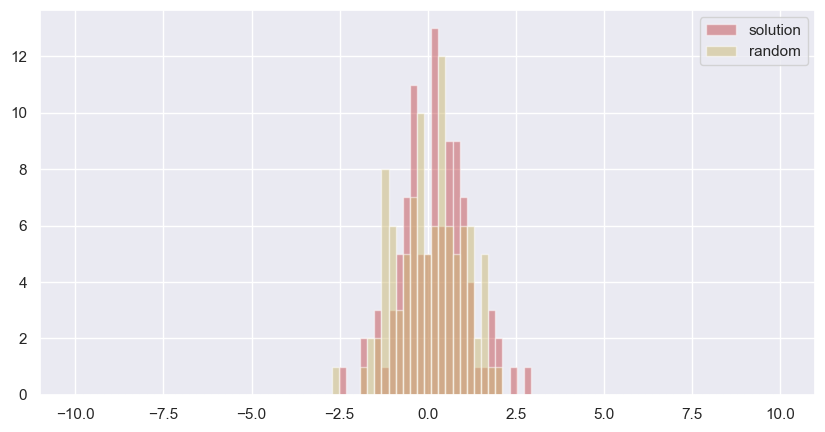

In [2]:
plt.figure(figsize = (10, 5))
bins = np.linspace(-10, 10, 100)

solution = np.random.randn(100)
w = np.random.randn(100)

plt.hist(solution, bins, alpha = 0.5, label = 'solution', color = 'r')
plt.hist(w, bins, alpha = 0.5, label = 'random', color = 'y')
plt.legend()
plt.show()

In [3]:
def f(w):
    return -np.sum(np.square(solution - w))


npop = 50
sigma = 0.1
alpha = 0.001

for i in range(5000):

    if (i + 1) % 1000 == 0:
        print(
            'iter %d. w: %s, solution: %s, reward: %f'
            % (i + 1, str(w[-1]), str(solution[-1]), f(w))
        )
    N = np.random.randn(npop, 100)
    R = np.zeros(npop)
    for j in range(npop):
        w_try = w + sigma * N[j]
        R[j] = f(w_try)

    A = (R - np.mean(R)) / np.std(R)
    w = w + alpha / (npop * sigma) * np.dot(N.T, A)

iter 1000. w: 0.7035273861179241, solution: 0.7979299939747988, reward: -10.697650
iter 2000. w: 0.7879893718488995, solution: 0.7979299939747988, reward: -0.008582
iter 3000. w: 0.7993578105267473, solution: 0.7979299939747988, reward: -0.009355
iter 4000. w: 0.8110064732541801, solution: 0.7979299939747988, reward: -0.007082
iter 5000. w: 0.7993534413828114, solution: 0.7979299939747988, reward: -0.006844


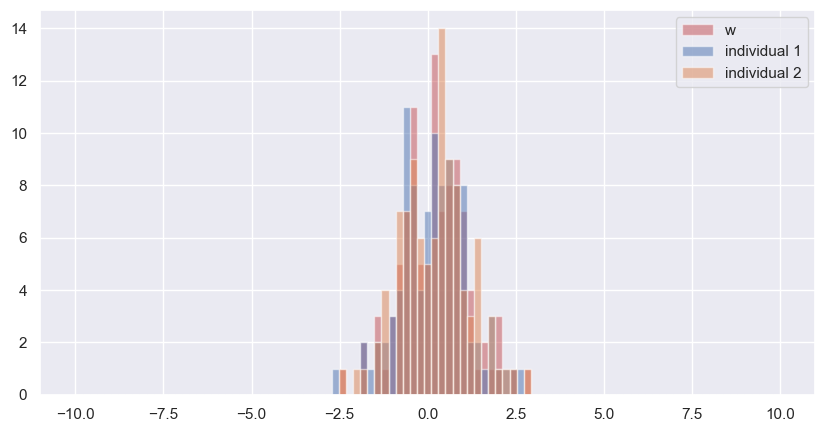

In [4]:
'''
I want to compare my first two individuals with my real w
'''
plt.figure(figsize=(10,5))

sigma = 0.1
N = np.random.randn(npop, 100)
individuals = []
for j in range(2):
    individuals.append(w + sigma * N[j])
    
    
plt.hist(w, bins, alpha=0.5, label='w',color='r')
plt.hist(individuals[0], bins, alpha=0.5, label='individual 1')
plt.hist(individuals[1], bins, alpha=0.5, label='individual 2')
plt.legend()
plt.show()

In [5]:
import pandas as pd
google = pd.read_csv('Data\SP500_train.csv')
google.head()

,date,open,high,low,close,adj_close,volume
0,2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
1,2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2,2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
3,2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
4,2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


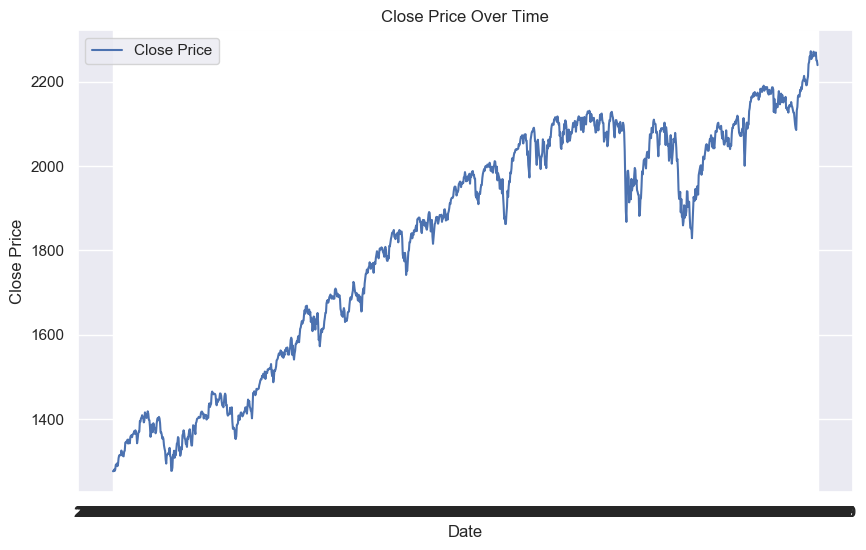

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(google['date'], google['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
def get_state(data, t, n):
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d * [data[0]] + data[: t + 1]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

In [7]:
close = google.close.values.tolist()
get_state(close, 0, 10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
get_state(close, 1, 10)

array([[0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.23999]])

In [9]:
get_state(close, 2, 10)

array([[0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.23999, 3.76001]])

In [10]:
class Deep_Evolution_Strategy:
    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / np.std(rewards)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')

In [11]:
class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        buy = np.dot(feed, self.weights[2])
        return decision, buy

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

In [12]:
window_size = 30
model = Model(window_size, 500, 3)

In [13]:
initial_money = 1000
starting_money = initial_money
len_close = len(close) - 1
weight = model
skip = 1

state = get_state(close, 0, window_size + 1)
inventory = []
quantity = 0

max_buy = 5
max_sell = 5


def act(model, sequence):
    decision, buy = model.predict(np.array(sequence))
    return np.argmax(decision[0]), int(buy[0])


for t in range(0, len_close, skip):
    action, buy = act(weight, state)
    next_state = get_state(close, t + 1, window_size + 1)
    if action == 1 and initial_money >= close[t]:
        if buy < 0:
            buy = 1
        if buy > max_buy:
            buy_units = max_buy
        else:
            buy_units = buy
        total_buy = buy_units * close[t]
        initial_money -= total_buy
        inventory.append(total_buy)
        quantity += buy_units
    elif action == 2 and len(inventory) > 0:
        if quantity > max_sell:
            sell_units = max_sell
        else:
            sell_units = quantity
        quantity -= sell_units
        total_sell = sell_units * close[t]
        initial_money += total_sell

    state = next_state
((initial_money - starting_money) / starting_money) * 100

0.0

In [14]:
import time


class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(
        self, model, money, max_buy, max_sell, close, window_size, skip
    ):
        self.window_size = window_size
        self.skip = skip
        self.close = close
        self.model = model
        self.initial_money = money
        self.max_buy = max_buy
        self.max_sell = max_sell
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision, buy = self.model.predict(np.array(sequence))
        return np.argmax(decision[0]), int(buy[0])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        len_close = len(self.close) - 1

        self.model.weights = weights
        state = get_state(self.close, 0, self.window_size + 1)
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
            elif action == 2 and len(inventory) > 0:
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell

            state = next_state
        return ((initial_money - starting_money) / starting_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        len_close = len(self.close) - 1
        state = get_state(self.close, 0, self.window_size + 1)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                states_buy.append(t)
                print(
                    'day %d: buy %d units at price %f, total balance %f'
                    % (t, buy_units, total_buy, initial_money)
                )
            elif action == 2 and len(inventory) > 0:
                bought_price = inventory.pop(0)
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                if sell_units < 1:
                    continue
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell
                states_sell.append(t)
                try:
                    invest = ((total_sell - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (t, sell_units, total_sell, invest, initial_money)
                )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        print(
            '\ntotal gained %f, total investment %f %%'
            % (initial_money - starting_money, invest)
        )
        plt.figure(figsize = (20, 10))
        plt.plot(close, label = 'true close', c = 'g')
        plt.plot(
            close, 'X', label = 'predict buy', markevery = states_buy, c = 'b'
        )
        plt.plot(
            close, 'o', label = 'predict sell', markevery = states_sell, c = 'r'
        )
        plt.legend()
        plt.show()

In [15]:
model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(
    model = model,
    money = 10000,
    max_buy = 5,
    max_sell = 5,
    close = close,
    window_size = window_size,
    skip = 1,
)

In [19]:
agent.fit(iterations = 2000, checkpoint = 10)

iter 10. reward: 302.379212
iter 20. reward: 315.704089
iter 30. reward: 300.140942
iter 40. reward: 306.923546
iter 50. reward: 292.868485
iter 60. reward: 300.336285
iter 70. reward: 301.119695
iter 80. reward: 309.755215
iter 90. reward: 321.855187
iter 100. reward: 297.955303
iter 110. reward: 300.941912
iter 120. reward: 304.933298
iter 130. reward: 306.712805
iter 140. reward: 310.052327
iter 150. reward: 315.958813
iter 160. reward: 313.345443
iter 170. reward: 331.894129
iter 180. reward: 299.342943
iter 190. reward: 300.826157
iter 200. reward: 308.291551
iter 210. reward: 311.244576
iter 220. reward: 303.875253
iter 230. reward: 317.562057
iter 240. reward: 301.869936
iter 250. reward: 318.273171
iter 260. reward: 307.619314
iter 270. reward: 307.874040
iter 280. reward: 305.482338
iter 290. reward: 318.175470
iter 300. reward: 332.501649
iter 310. reward: 344.310838
iter 320. reward: 319.714744
iter 330. reward: 330.079833
iter 340. reward: 312.698944
iter 350. reward: 327.0

day 3: buy 1 units at price 1277.810059, total balance 8722.189941
day 5, sell 1 units at price 1292.079956, investment 1.116746 %, total balance 10014.269897,
day 8: buy 1 units at price 1289.089966, total balance 8725.179931
day 9, sell 1 units at price 1293.670044, investment 0.355295 %, total balance 10018.849975,
day 13: buy 1 units at price 1316.000000, total balance 8702.849975
day 14: buy 1 units at price 1314.650024, total balance 7388.199951
day 15, sell 2 units at price 2652.120118, investment 101.528884 %, total balance 10040.320069,
day 16: buy 1 units at price 1318.430054, total balance 8721.890015
day 17, sell 1 units at price 1316.329956, investment 0.127785 %, total balance 10038.219971,
day 18: buy 5 units at price 6565.050050, total balance 3473.169921
day 19: buy 1 units at price 1312.410034, total balance 2160.759887
day 20: buy 5 units at price 6620.449830, total balance -4459.689943
day 22, sell 5 units at price 6724.500120, investment 410.038443 %, total balance

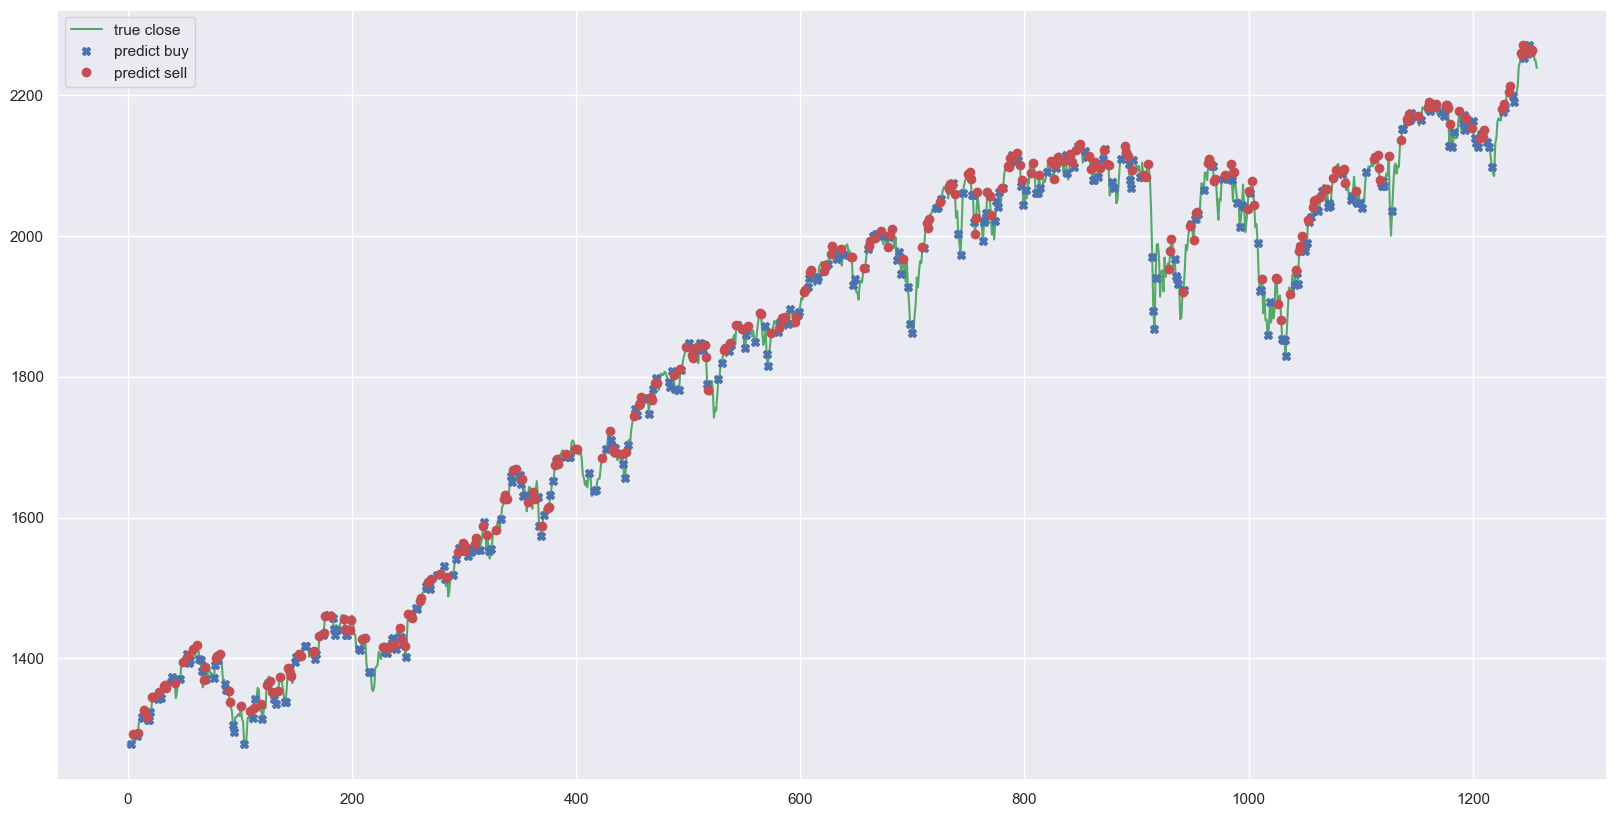

In [21]:
agent.buy()